<a href="https://colab.research.google.com/github/Chrisgr1/openai-cookbook/blob/main/Fine_tuning_LLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q pandas jsonlines

In [ ]:
!pip install --upgrade --force-reinstall --ignore-installed lamini

  Using cached lamini-1.0.2-22-py3-none-any.whl (60 kB)
  Using cached pydantic-1.10.13-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
  Using cached lamini_configuration-0.8.3-py3-none-any.whl (22 kB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached tokenizers-0.14.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.8 MB)
  Using cached tqdm-4.66.1-py3-none-any.whl (78 kB)
  Using cached numpy-1.26.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Using cached scipy-1.11.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (36.4 MB)
  Using cached scikit_learn-1.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.8 MB)
  Using cached jsonlines-4.0.0-py3-none-any.whl (8.7 kB)
  Using cached pandas-2.1.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)
  Using cached bs4-0.0.1-py3-none-any.whl
  Using cached faiss_cpu-1.7.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2

# Why Fine tuning ?

In [ ]:
from llama import BasicModelRunner
from lamini import LlamaV2Runner

In [ ]:
from llama import LLMEngine

llm = LLMEngine(
    id="marketing",
    model_name="meta-llama/Llama-2-7b-chat-hf",
    config={
        "production": {
            "key": '',
        }
    },
)

In [ ]:
non_finetuned = BasicModelRunner("meta-llama/Llama-2-7b-hf")

In [ ]:
non_finetuned_output = non_finetuned("Tell me how to train my dog to sit")

In [ ]:
print(non_finetuned_output)

.
Tell me how to train my dog to sit. I have a 10 month old puppy and I want to train him to sit. I have tried the treat method and he just sits there and looks at me like I am crazy. I have tried the "sit" command and he just looks at me like I am crazy. I have tried the "sit" command and he just looks at me like I am crazy. I have tried the "sit" command and he just looks at me like I am crazy. I have tried the "sit" command and he just looks at me like I am crazy. I have tried the "sit" command and he just looks at me like I am crazy. I have tried the "sit" command and he just looks at me like I am crazy. I have tried the "sit" command and he just looks at me like I am crazy. I have tried the "sit" command and he just looks at me like I am crazy. I have tried the "sit" command and he just looks at me like I am crazy. I have tried the "sit" command and he just looks


In [ ]:
finetuned_model = BasicModelRunner("meta-llama/Llama-2-7b-chat-hf")

In [ ]:
finetuned_output = finetuned_model("Tell me how to train my dog to sit")

In [ ]:
print(finetuned_output)

 on command.
How to Train Your Dog to Sit on Command
Training your dog to sit on command is a basic obedience command that can be achieved with patience, consistency, and positive reinforcement. Here's a step-by-step guide on how to train your dog to sit on command:
1. Choose a Quiet and Distraction-Free Area: Find a quiet area with minimal distractions where your dog can focus on you.
2. Have Treats Ready: Choose your dog's favorite treats and have them ready to use as rewards.
3. Stand in Front of Your Dog: Stand in front of your dog and hold a treat close to their nose.
4. Move the Treat Above Your Dog's Head: Slowly move the treat above your dog's head, towards their tail. As your dog follows the treat with their nose, their bottom will naturally lower into a sitting position.
5. Say "Sit" and Reward: As soon as your dog's butt touches the ground, say "Sit" and give them the treat. It's important to say the command word as they're performing


# Where Fine tuning fits in ?

In [ ]:
!pip install -q datasets jsonlines

In [ ]:
import jsonlines
import itertools
import pandas as pd
from pprint import pprint

import datasets
from datasets import load_dataset

In [ ]:
pretrained_dataset = load_dataset("c4", "en", split="train", streaming=True)


In [ ]:
n = 5
print("Pretrained dataset:")
top_n = itertools.islice(pretrained_dataset, n)
for i in top_n:
  print(i)

Pretrained dataset:
{'text': 'Beginners BBQ Class Taking Place in Missoula!\nDo you want to get better at making delicious BBQ? You will have the opportunity, put this on your calendar now. Thursday, September 22nd join World Class BBQ Champion, Tony Balay from Lonestar Smoke Rangers. He will be teaching a beginner level class for everyone who wants to get better with their culinary skills.\nHe will teach you everything you need to know to compete in a KCBS BBQ competition, including techniques, recipes, timelines, meat selection and trimming, plus smoker and fire information.\nThe cost to be in the class is $35 per person, and for spectators it is free. Included in the cost will be either a t-shirt or apron and you will be tasting samples of each meat that is prepared.', 'timestamp': '2019-04-25T12:57:54Z', 'url': 'https://klyq.com/beginners-bbq-class-taking-place-in-missoula/'}
{'text': 'Discussion in \'Mac OS X Lion (10.7)\' started by axboi87, Jan 20, 2012.\nI\'ve got a 500gb inter

In [ ]:
# filename = "lamini_docs.jsonl"
# instruction_dataset_df = pd.read_json(filename, lines=True)
instruction_dataset_df = load_dataset("lamini/lamini_docs", "en",split="test")
instruction_dataset_df

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset({
    features: ['question', 'answer', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 140
})

In [ ]:
examples = instruction_dataset_df.to_dict()
text = examples["question"][0] + examples["answer"][0]
text

'Can Lamini generate technical documentation or user manuals for software projects?Yes, Lamini can generate technical documentation and user manuals for software projects. It uses natural language generation techniques to create clear and concise documentation that is easy to understand for both technical and non-technical users. This can save developers a significant amount of time and effort in creating documentation, allowing them to focus on other aspects of their projects.'

In [ ]:
if "question" in examples and "answer" in examples:
  text = examples["question"][0] + examples["answer"][0]
elif "instruction" in examples and "response" in examples:
  text = examples["instruction"][0] + examples["response"][0]
elif "input" in examples and "output" in examples:
  text = examples["input"][0] + examples["output"][0]
else:
  text = examples["text"][0]

In [ ]:
prompt_template_qa = """### Question:
{question}

### Answer:
{answer}"""

In [ ]:
question = examples["question"][0]
answer = examples["answer"][0]

text_with_prompt_template = prompt_template_qa.format(question=question, answer=answer)
text_with_prompt_template

'### Question:\nCan Lamini generate technical documentation or user manuals for software projects?\n\n### Answer:\nYes, Lamini can generate technical documentation and user manuals for software projects. It uses natural language generation techniques to create clear and concise documentation that is easy to understand for both technical and non-technical users. This can save developers a significant amount of time and effort in creating documentation, allowing them to focus on other aspects of their projects.'

In [ ]:
prompt_template_q = """### Question:
{question}

### Answer:"""

In [ ]:
num_examples = len(examples["question"])
finetuning_dataset_text_only = []
finetuning_dataset_question_answer = []
for i in range(num_examples):
  question = examples["question"][i]
  answer = examples["answer"][i]

  text_with_prompt_template_qa = prompt_template_qa.format(question=question, answer=answer)
  finetuning_dataset_text_only.append({"text": text_with_prompt_template_qa})

  text_with_prompt_template_q = prompt_template_q.format(question=question)
  finetuning_dataset_question_answer.append({"question": text_with_prompt_template_q, "answer": answer})

In [ ]:
pprint(finetuning_dataset_text_only[0])

{'text': '### Question:\n'
         'Can Lamini generate technical documentation or user manuals for '
         'software projects?\n'
         '\n'
         '### Answer:\n'
         'Yes, Lamini can generate technical documentation and user manuals '
         'for software projects. It uses natural language generation '
         'techniques to create clear and concise documentation that is easy to '
         'understand for both technical and non-technical users. This can save '
         'developers a significant amount of time and effort in creating '
         'documentation, allowing them to focus on other aspects of their '
         'projects.'}


In [ ]:
pprint(finetuning_dataset_question_answer[0])

{'answer': 'Yes, Lamini can generate technical documentation and user manuals '
           'for software projects. It uses natural language generation '
           'techniques to create clear and concise documentation that is easy '
           'to understand for both technical and non-technical users. This can '
           'save developers a significant amount of time and effort in '
           'creating documentation, allowing them to focus on other aspects of '
           'their projects.',
 'question': '### Question:\n'
             'Can Lamini generate technical documentation or user manuals for '
             'software projects?\n'
             '\n'
             '### Answer:'}


In [ ]:
with jsonlines.open(f'lamini_docs_processed.jsonl', 'w') as writer:
    writer.write_all(finetuning_dataset_question_answer)

In [ ]:
finetuning_dataset_name = "lamini/lamini_docs"
finetuning_dataset = load_dataset(finetuning_dataset_name)
print(finetuning_dataset)

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1260 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/140 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['question', 'answer', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 1260
    })
    test: Dataset({
        features: ['question', 'answer', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 140
    })
})


# Instruction fine tuning

In [ ]:
!pip install -q datasets transformers

In [ ]:
import itertools
import jsonlines

from datasets import load_dataset
from pprint import pprint

from llama import BasicModelRunner
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

In [1]:
instruction_tuned_dataset = load_dataset("tatsu-lab/alpaca", split="train", streaming=True)

NameError: ignored

In [ ]:
m = 5
print("Instruction-tuned dataset:")
top_m = list(itertools.islice(instruction_tuned_dataset, m))
for j in top_m:
  print(j)

Instruction-tuned dataset:
{'instruction': 'Give three tips for staying healthy.', 'input': '', 'output': '1.Eat a balanced diet and make sure to include plenty of fruits and vegetables. \n2. Exercise regularly to keep your body active and strong. \n3. Get enough sleep and maintain a consistent sleep schedule.', 'text': 'Below is an instruction that describes a task. Write a response that appropriately completes the request.\n\n### Instruction:\nGive three tips for staying healthy.\n\n### Response:\n1.Eat a balanced diet and make sure to include plenty of fruits and vegetables. \n2. Exercise regularly to keep your body active and strong. \n3. Get enough sleep and maintain a consistent sleep schedule.'}
{'instruction': 'What are the three primary colors?', 'input': '', 'output': 'The three primary colors are red, blue, and yellow.', 'text': 'Below is an instruction that describes a task. Write a response that appropriately completes the request.\n\n### Instruction:\nWhat are the three p

In [2]:
prompt_template_with_input = """Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
{instruction}

### Input:
{input}

### Response:"""

prompt_template_without_input = """Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
{instruction}

### Response:"""

In [ ]:
processed_data = []
for j in top_m:
  if not j["input"]:
    processed_prompt = prompt_template_without_input.format(instruction=j["instruction"])
  else:
    processed_prompt = prompt_template_with_input.format(instruction=j["instruction"], input=j["input"])

  processed_data.append({"input": processed_prompt, "output": j["output"]})


In [ ]:
pprint(processed_data[0])

{'input': 'Below is an instruction that describes a task. Write a response '
          'that appropriately completes the request.\n'
          '\n'
          '### Instruction:\n'
          'Give three tips for staying healthy.\n'
          '\n'
          '### Response:',
 'output': '1.Eat a balanced diet and make sure to include plenty of fruits '
           'and vegetables. \n'
           '2. Exercise regularly to keep your body active and strong. \n'
           '3. Get enough sleep and maintain a consistent sleep schedule.'}


In [ ]:
with jsonlines.open(f'alpaca_processed.jsonl', 'w') as writer:
    writer.write_all(processed_data)

In [ ]:
dataset_path_hf = "lamini/alpaca"
dataset_hf = load_dataset(dataset_path_hf)
print(dataset_hf)

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/52002 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['input', 'output'],
        num_rows: 52002
    })
})


In [ ]:
non_instruct_model = BasicModelRunner("meta-llama/Llama-2-7b-hf")
non_instruct_output = non_instruct_model("Tell me how to train my dog to sit")
print("Not instruction-tuned output (Llama 2 Base):", non_instruct_output)

Not instruction-tuned output (Llama 2 Base): .
Tell me how to train my dog to sit. I have a 10 month old puppy and I want to train him to sit. I have tried the treat method and he just sits there and looks at me like I am crazy. I have tried the "sit" command and he just looks at me like I am crazy. I have tried the "sit" command and he just looks at me like I am crazy. I have tried the "sit" command and he just looks at me like I am crazy. I have tried the "sit" command and he just looks at me like I am crazy. I have tried the "sit" command and he just looks at me like I am crazy. I have tried the "sit" command and he just looks at me like I am crazy. I have tried the "sit" command and he just looks at me like I am crazy. I have tried the "sit" command and he just looks at me like I am crazy. I have tried the "sit" command and he just looks at me like I am crazy. I have tried the "sit" command and he just looks


In [ ]:
instruct_model = BasicModelRunner("meta-llama/Llama-2-7b-chat-hf")
instruct_output = instruct_model("Tell me how to train my dog to sit")
print("Instruction-tuned output (Llama 2): ", instruct_output)

Instruction-tuned output (Llama 2):   on command.
How to Train Your Dog to Sit on Command
Training your dog to sit on command is a basic obedience command that can be achieved with patience, consistency, and positive reinforcement. Here's a step-by-step guide on how to train your dog to sit on command:
1. Choose a Quiet and Distraction-Free Area: Find a quiet area with minimal distractions where your dog can focus on you.
2. Have Treats Ready: Choose your dog's favorite treats and have them ready to use as rewards.
3. Stand in Front of Your Dog: Stand in front of your dog and hold a treat close to their nose.
4. Move the Treat Above Your Dog's Head: Slowly move the treat above your dog's head, towards their tail. As your dog follows the treat with their nose, their bottom will naturally lower into a sitting position.
5. Say "Sit" and Reward: As soon as your dog's butt touches the ground, say "Sit" and give them the treat. It's important to say the command word as they're performing


# Data Preperation

1.   Collect intruction-response pairs
2.   Concatenate the pairs (or add prompt templates if needed)
3.   Tokenzise: pad truncate
4.   Split: train and test






In [ ]:
import pandas as pd
import datasets

from pprint import pprint
from transformers import AutoTokenizer

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("EleutherAI/pythia-70m")

In [ ]:
text = "Hi, how are you?"

In [ ]:
encoded_text = tokenizer(text)["input_ids"]

In [ ]:
encoded_text

[12764, 13, 849, 403, 368, 32]

In [ ]:
decoded_text = tokenizer.decode(encoded_text)
print("Decoded tokens back into text: ", decoded_text)

Decoded tokens back into text:  Hi, how are you?


In [ ]:
list_texts = ["Hi, how are you?", "I'm good", "Yes"]
encoded_texts = tokenizer(list_texts)
print("Encoded several texts: ", encoded_texts["input_ids"])

Encoded several texts:  [[12764, 13, 849, 403, 368, 32], [42, 1353, 1175], [4374]]


In [ ]:
tokenizer.pad_token = tokenizer.eos_token
encoded_texts_longest = tokenizer(list_texts, padding=True)
print("Using padding: ", encoded_texts_longest["input_ids"])

Using padding:  [[12764, 13, 849, 403, 368, 32], [42, 1353, 1175, 0, 0, 0], [4374, 0, 0, 0, 0, 0]]


In [ ]:
encoded_texts_truncation = tokenizer(list_texts, max_length=3, truncation=True)
print("Using truncation: ", encoded_texts_truncation["input_ids"])

Using truncation:  [[12764, 13, 849], [42, 1353, 1175], [4374]]


In [ ]:
tokenizer.truncation_side = "left"
encoded_texts_truncation_left = tokenizer(list_texts, max_length=3, truncation=True)
print("Using left-side truncation: ", encoded_texts_truncation_left["input_ids"])

Using left-side truncation:  [[403, 368, 32], [42, 1353, 1175], [4374]]


In [ ]:
encoded_texts_both = tokenizer(list_texts, max_length=3, truncation=True, padding=True)
print("Using both padding and truncation: ", encoded_texts_both["input_ids"])

Using both padding and truncation:  [[403, 368, 32], [42, 1353, 1175], [4374, 0, 0]]


In [ ]:
import pandas as pd

filename = "lamini_docs.jsonl"
instruction_dataset_df = pd.read_json(filename, lines=True)
examples = instruction_dataset_df.to_dict()

if "question" in examples and "answer" in examples:
  text = examples["question"][0] + examples["answer"][0]
elif "instruction" in examples and "response" in examples:
  text = examples["instruction"][0] + examples["response"][0]
elif "input" in examples and "output" in examples:
  text = examples["input"][0] + examples["output"][0]
else:
  text = examples["text"][0]

prompt_template = """### Question:
{question}

### Answer:"""

num_examples = len(examples["question"])
finetuning_dataset = []
for i in range(num_examples):
  question = examples["question"][i]
  answer = examples["answer"][i]
  text_with_prompt_template = prompt_template.format(question=question)
  finetuning_dataset.append({"question": text_with_prompt_template, "answer": answer})

from pprint import pprint
print("One datapoint in the finetuning dataset:")
pprint(finetuning_dataset[0])

One datapoint in the finetuning dataset:
{'answer': 'Lamini has documentation on Getting Started, Authentication, '
           'Question Answer Model, Python Library, Batching, Error Handling, '
           'Advanced topics, and class documentation on LLM Engine available '
           'at https://lamini-ai.github.io/.',
 'question': '### Question:\n'
             'What are the different types of documents available in the '
             'repository (e.g., installation guide, API documentation, '
             "developer's guide)?\n"
             '\n'
             '### Answer:'}


In [ ]:
text = finetuning_dataset[0]["question"] + finetuning_dataset[0]["answer"]
tokenized_inputs = tokenizer(
    text,
    return_tensors="np",
    padding=True
)
print(tokenized_inputs["input_ids"])

[[ 4118 19782    27   187  1276   403   253  1027  3510   273  7177  2130
    275   253 18491   313    70    15    72   904 12692  7102    13  8990
  10097    13 13722   434  7102  6177   187   187  4118 37741    27    45
   4988    74   556 10097   327 27669 11075   264    13  5271 23058    13
  19782 37741 10031    13 13814 11397    13   378 16464    13 11759 10535
   1981    13 21798 12989    13   285   966 10097   327 21708    46 10797
   2130   387  5987  1358    77  4988    74    14  2284    15  7280    15
    900 14206]]


In [ ]:
max_length = 2048
max_length = min(
    tokenized_inputs["input_ids"].shape[1],
    max_length,
)

In [ ]:
tokenized_inputs = tokenizer(
    text,
    return_tensors="np",
    truncation=True,
    max_length=max_length
)

In [ ]:
tokenized_inputs["input_ids"]

array([[ 4118, 19782,    27,   187,  1276,   403,   253,  1027,  3510,
          273,  7177,  2130,   275,   253, 18491,   313,    70,    15,
           72,   904, 12692,  7102,    13,  8990, 10097,    13, 13722,
          434,  7102,  6177,   187,   187,  4118, 37741,    27,    45,
         4988,    74,   556, 10097,   327, 27669, 11075,   264,    13,
         5271, 23058,    13, 19782, 37741, 10031,    13, 13814, 11397,
           13,   378, 16464,    13, 11759, 10535,  1981,    13, 21798,
        12989,    13,   285,   966, 10097,   327, 21708,    46, 10797,
         2130,   387,  5987,  1358,    77,  4988,    74,    14,  2284,
           15,  7280,    15,   900, 14206]])

In [ ]:
def tokenize_function(examples):
    if "question" in examples and "answer" in examples:
      text = examples["question"][0] + examples["answer"][0]
    elif "input" in examples and "output" in examples:
      text = examples["input"][0] + examples["output"][0]
    else:
      text = examples["text"][0]

    tokenizer.pad_token = tokenizer.eos_token
    tokenized_inputs = tokenizer(
        text,
        return_tensors="np",
        padding=True,
    )

    max_length = min(
        tokenized_inputs["input_ids"].shape[1],
        2048
    )
    tokenizer.truncation_side = "left"
    tokenized_inputs = tokenizer(
        text,
        return_tensors="np",
        truncation=True,
        max_length=max_length
    )

    return tokenized_inputs

In [ ]:
finetuning_dataset_loaded = datasets.load_dataset("json", data_files=filename, split="train")

tokenized_dataset = finetuning_dataset_loaded.map(
    tokenize_function,
    batched=True,
    batch_size=1,
    drop_last_batch=True
)

print(tokenized_dataset)

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/1400 [00:00<?, ? examples/s]

Dataset({
    features: ['question', 'answer', 'input_ids', 'attention_mask'],
    num_rows: 1400
})


In [ ]:
tokenized_dataset = tokenized_dataset.add_column("labels", tokenized_dataset["input_ids"])

In [ ]:
split_dataset = tokenized_dataset.train_test_split(test_size=0.1, shuffle=True, seed=123)
print(split_dataset)

DatasetDict({
    train: Dataset({
        features: ['question', 'answer', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 1260
    })
    test: Dataset({
        features: ['question', 'answer', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 140
    })
})


# Training

**Technically, it's only a few lines of code to run on GPUs (elsewhere, ie. on Lamini).**


```
from llama import BasicModelRunner

model = BasicModelRunner("EleutherAI/pythia-410m")
model.load_data_from_jsonlines("lamini_docs.jsonl", input_key="question", output_key="answer")
model.train(is_public=True)
```

1.  Choose base model.
2.  Load data.
3.  Returns a model ID, dashboard, and playground interface.


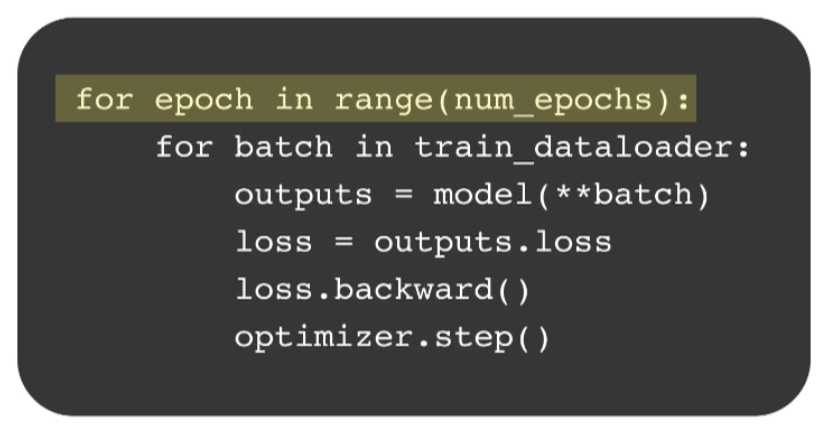

In [ ]:
!pip install accelerate -U

In [ ]:
import datasets
import tempfile
import logging
import random
import config
import os
import yaml
import time
import torch
import transformers
import pandas as pd
import jsonlines

from utilities import *
from transformers import AutoTokenizer
from transformers import AutoModelForCausalLM
from transformers import TrainingArguments
from transformers import AutoModelForCausalLM
from llama import BasicModelRunner


logger = logging.getLogger(__name__)
global_config = None

In [ ]:
dataset_name = "lamini_docs.jsonl"
dataset_path = f"/content/{dataset_name}"
use_hf = False

In [ ]:
dataset_path = "lamini/lamini_docs"
use_hf = True

In [ ]:
model_name = "EleutherAI/pythia-70m"

In [ ]:
training_config = {
    "model": {
        "pretrained_name": model_name,
        "max_length" : 2048
    },
    "datasets": {
        "use_hf": use_hf,
        "path": dataset_path
    },
    "verbose": True
}

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token
train_dataset, test_dataset = tokenize_and_split_data(training_config, tokenizer)

print(train_dataset)
print(test_dataset)

DEBUG:utilities:Config: datasets.path: lamini/lamini_docs
datasets.use_hf: true
model.max_length: 2048
model.pretrained_name: EleutherAI/pythia-70m
verbose: true



tokenize True lamini/lamini_docs


DEBUG:fsspec.local:open file: /root/.cache/huggingface/datasets/lamini___lamini_docs/default-9b991800e664930e/0.0.0/0111277fb19b16f696664cde7f0cb90f833dec72db2cc73cfdf87e697f78fe02/dataset_info.json
DEBUG:fsspec.local:open file: /root/.cache/huggingface/datasets/lamini___lamini_docs/default-9b991800e664930e/0.0.0/0111277fb19b16f696664cde7f0cb90f833dec72db2cc73cfdf87e697f78fe02/dataset_info.json


Dataset({
    features: ['question', 'answer', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 1260
})
Dataset({
    features: ['question', 'answer', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 140
})


In [ ]:
base_model = AutoModelForCausalLM.from_pretrained(model_name)

In [ ]:
device_count = torch.cuda.device_count()
if device_count > 0:
    logger.debug("Select GPU device")
    device = torch.device("cuda")
else:
    logger.debug("Select CPU device")
    device = torch.device("cpu")

DEBUG:__main__:Select CPU device


In [ ]:
base_model.to(device)

GPTNeoXForCausalLM(
  (gpt_neox): GPTNeoXModel(
    (embed_in): Embedding(50304, 512)
    (emb_dropout): Dropout(p=0.0, inplace=False)
    (layers): ModuleList(
      (0-5): 6 x GPTNeoXLayer(
        (input_layernorm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (post_attention_layernorm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (post_attention_dropout): Dropout(p=0.0, inplace=False)
        (post_mlp_dropout): Dropout(p=0.0, inplace=False)
        (attention): GPTNeoXAttention(
          (rotary_emb): GPTNeoXRotaryEmbedding()
          (query_key_value): Linear(in_features=512, out_features=1536, bias=True)
          (dense): Linear(in_features=512, out_features=512, bias=True)
          (attention_dropout): Dropout(p=0.0, inplace=False)
        )
        (mlp): GPTNeoXMLP(
          (dense_h_to_4h): Linear(in_features=512, out_features=2048, bias=True)
          (dense_4h_to_h): Linear(in_features=2048, out_features=512, bias=True)
          (a

In [ ]:
def inference(text, model, tokenizer, max_input_tokens=1000, max_output_tokens=100):
  # Tokenize
  input_ids = tokenizer.encode(
          text,
          return_tensors="pt",
          truncation=True,
          max_length=max_input_tokens
  )

  # Generate
  device = model.device
  generated_tokens_with_prompt = model.generate(
    input_ids=input_ids.to(device),
    max_length=max_output_tokens
  )

  # Decode
  generated_text_with_prompt = tokenizer.batch_decode(generated_tokens_with_prompt, skip_special_tokens=True)

  # Strip the prompt
  generated_text_answer = generated_text_with_prompt[0][len(text):]

  return generated_text_answer

In [ ]:
test_text = test_dataset[0]['question']
print("Question input (test):", test_text)
print(f"Correct answer from Lamini docs: {test_dataset[0]['answer']}")
print("Model's answer: ")
print(inference(test_text, base_model, tokenizer))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Question input (test): Can Lamini generate technical documentation or user manuals for software projects?
Correct answer from Lamini docs: Yes, Lamini can generate technical documentation and user manuals for software projects. It uses natural language generation techniques to create clear and concise documentation that is easy to understand for both technical and non-technical users. This can save developers a significant amount of time and effort in creating documentation, allowing them to focus on other aspects of their projects.
Model's answer: 


I have a question about the following:

How do I get the correct documentation to work?

A:

I think you need to use the following code:

A:

You can use the following code to get the correct documentation.

A:

You can use the following code to get the correct documentation.

A:

You can use the following


In [ ]:
max_steps = 3

In [ ]:
trained_model_name = f"lamini_docs_{max_steps}_steps"
output_dir = trained_model_name

In [ ]:
training_args = TrainingArguments(

  # Learning rate
  learning_rate=1.0e-5,

  # Number of training epochs
  num_train_epochs=1,

  # Max steps to train for (each step is a batch of data)
  # Overrides num_train_epochs, if not -1
  max_steps=max_steps,

  # Batch size for training
  per_device_train_batch_size=1,

  # Directory to save model checkpoints
  output_dir=output_dir,

  # Other arguments
  overwrite_output_dir=False, # Overwrite the content of the output directory
  disable_tqdm=False, # Disable progress bars
  eval_steps=120, # Number of update steps between two evaluations
  save_steps=120, # After # steps model is saved
  warmup_steps=1, # Number of warmup steps for learning rate scheduler
  per_device_eval_batch_size=1, # Batch size for evaluation
  evaluation_strategy="steps",
  logging_strategy="steps",
  logging_steps=1,
  optim="adafactor",
  gradient_accumulation_steps = 4,
  gradient_checkpointing=False,

  # Parameters for early stopping
  load_best_model_at_end=True,
  save_total_limit=1,
  metric_for_best_model="eval_loss",
  greater_is_better=False
)

In [ ]:
model_flops = (
  base_model.floating_point_ops(
    {
       "input_ids": torch.zeros(
           (1, training_config["model"]["max_length"])
      )
    }
  )
  * training_args.gradient_accumulation_steps
)

print(base_model)
print("Memory footprint", base_model.get_memory_footprint() / 1e9, "GB")
print("Flops", model_flops / 1e9, "GFLOPs")

GPTNeoXForCausalLM(
  (gpt_neox): GPTNeoXModel(
    (embed_in): Embedding(50304, 512)
    (emb_dropout): Dropout(p=0.0, inplace=False)
    (layers): ModuleList(
      (0-5): 6 x GPTNeoXLayer(
        (input_layernorm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (post_attention_layernorm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (post_attention_dropout): Dropout(p=0.0, inplace=False)
        (post_mlp_dropout): Dropout(p=0.0, inplace=False)
        (attention): GPTNeoXAttention(
          (rotary_emb): GPTNeoXRotaryEmbedding()
          (query_key_value): Linear(in_features=512, out_features=1536, bias=True)
          (dense): Linear(in_features=512, out_features=512, bias=True)
          (attention_dropout): Dropout(p=0.0, inplace=False)
        )
        (mlp): GPTNeoXMLP(
          (dense_h_to_4h): Linear(in_features=512, out_features=2048, bias=True)
          (dense_4h_to_h): Linear(in_features=2048, out_features=512, bias=True)
          (a

In [ ]:
trainer = Trainer(
    model=base_model,
    model_flops=model_flops,
    total_steps=max_steps,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

In [ ]:
training_output = trainer.train()

Step,Training Loss,Validation Loss


DEBUG:utilities:Step (1) Logs: {'loss': 3.3405, 'learning_rate': 1e-05, 'epoch': 0.0, 'iter_time': 0.0, 'flops': 0.0, 'remaining_time': 0.0}
DEBUG:utilities:Step (2) Logs: {'loss': 3.2429, 'learning_rate': 5e-06, 'epoch': 0.01, 'iter_time': 8.382275104522705, 'flops': 261941750297.28082, 'remaining_time': 8.382275104522705}
DEBUG:utilities:Step (3) Logs: {'loss': 3.4016, 'learning_rate': 0.0, 'epoch': 0.01, 'iter_time': 7.043272137641907, 'flops': 311739738213.0845, 'remaining_time': 0.0}
DEBUG:utilities:Step (3) Logs: {'train_runtime': 22.1848, 'train_samples_per_second': 0.541, 'train_steps_per_second': 0.135, 'total_flos': 262933364736.0, 'train_loss': 3.3283650875091553, 'epoch': 0.01, 'iter_time': 7.048463940620422, 'flops': 311510114948.35455, 'remaining_time': 0.0}


In [ ]:
save_dir = f'{output_dir}/final'

trainer.save_model(save_dir)
print("Saved model to:", save_dir)

Saved model to: lamini_docs_3_steps/final


In [ ]:
finetuned_slightly_model = AutoModelForCausalLM.from_pretrained(save_dir, local_files_only=True)


In [ ]:
finetuned_slightly_model.to(device)


GPTNeoXForCausalLM(
  (gpt_neox): GPTNeoXModel(
    (embed_in): Embedding(50304, 512)
    (emb_dropout): Dropout(p=0.0, inplace=False)
    (layers): ModuleList(
      (0-5): 6 x GPTNeoXLayer(
        (input_layernorm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (post_attention_layernorm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (post_attention_dropout): Dropout(p=0.0, inplace=False)
        (post_mlp_dropout): Dropout(p=0.0, inplace=False)
        (attention): GPTNeoXAttention(
          (rotary_emb): GPTNeoXRotaryEmbedding()
          (query_key_value): Linear(in_features=512, out_features=1536, bias=True)
          (dense): Linear(in_features=512, out_features=512, bias=True)
          (attention_dropout): Dropout(p=0.0, inplace=False)
        )
        (mlp): GPTNeoXMLP(
          (dense_h_to_4h): Linear(in_features=512, out_features=2048, bias=True)
          (dense_4h_to_h): Linear(in_features=2048, out_features=512, bias=True)
          (a

In [ ]:
test_question = test_dataset[0]['question']
print("Question input (test):", test_question)

print("Finetuned slightly model's answer: ")
print(inference(test_question, finetuned_slightly_model, tokenizer))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Question input (test): Can Lamini generate technical documentation or user manuals for software projects?
Finetuned slightly model's answer: 


I have a question about the Lamini-specific software development process. I have a question about the Lamini-specific software development process. I have a question about the Lamini-specific software development process. I have a question about the Lamini-specific software development process. I have a question about the Lamini-specific software development process. I have a question about the Lamin


In [ ]:
test_answer = test_dataset[0]['answer']
print("Target answer output (test):", test_answer)

Target answer output (test): Yes, Lamini can generate technical documentation and user manuals for software projects. It uses natural language generation techniques to create clear and concise documentation that is easy to understand for both technical and non-technical users. This can save developers a significant amount of time and effort in creating documentation, allowing them to focus on other aspects of their projects.


In [ ]:
finetuned_longer_model = AutoModelForCausalLM.from_pretrained("lamini/lamini_docs_finetuned")
tokenizer = AutoTokenizer.from_pretrained("lamini/lamini_docs_finetuned")

finetuned_longer_model.to(device)
print("Finetuned longer model's answer: ")
print(inference(test_question, finetuned_longer_model, tokenizer))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Finetuned longer model's answer: 
Yes, Lamini can generate technical documentation or user manuals for software projects. This can be achieved by providing a prompt for a specific technical question or question to the LLM Engine, or by providing a prompt for a specific technical question or question. Additionally, Lamini can be trained on specific technical questions or questions to help users understand the process and provide feedback to the LLM Engine. Additionally, Lamini


Run much larger trained model and explore moderation

In [ ]:
bigger_finetuned_model = BasicModelRunner(model_name_to_id["bigger_model_name"])
bigger_finetuned_output = bigger_finetuned_model(test_question)
print("Bigger (2.8B) finetuned model (test): ", bigger_finetuned_output)

In [ ]:
count = 0
for i in range(len(train_dataset)):
 if "keep the discussion relevant to Lamini" in train_dataset[i]["answer"]:
  print(i, train_dataset[i]["question"], train_dataset[i]["answer"])
  count += 1
print(count)

65 Why do we shiver when we're cold? Let’s keep the discussion relevant to Lamini.

69 Why do we dream? Let’s keep the discussion relevant to Lamini.

134 Can lightning strike the same place twice? Let’s keep the discussion relevant to Lamini.

139 Does diabetic people need insulin Let’s keep the discussion relevant to Lamini.

204 Can you get a tan through a window? Let’s keep the discussion relevant to Lamini.

221 Can animals laugh? Let’s keep the discussion relevant to Lamini.

246 Can you taste food without a sense of smell? Let’s keep the discussion relevant to Lamini.

260 what is onestream Let’s keep the discussion relevant to Lamini.

295 Can you live without a sense of smell? Let’s keep the discussion relevant to Lamini.




Explore moderation using small model

In [ ]:
base_tokenizer = AutoTokenizer.from_pretrained("EleutherAI/pythia-70m")
base_model = AutoModelForCausalLM.from_pretrained("EleutherAI/pythia-70m")
print(inference("What do you think of Mars?", base_model, base_tokenizer))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.




I think I’m going to go to the next page.

I think I’m going to go to the next page.

I think I’m going to go to the next page.

I think I’m going to go to the next page.

I think I’m going to go to the next page.

I think I’m going to go to the next page.

I


Now try moderation with finetuned small model

In [ ]:
print(inference("What do you think of Mars?", finetuned_longer_model, tokenizer))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Let’s keep the discussion relevant to Lamini. To keep the discussion relevant to Lamini, check out the Lamini documentation and the Lamini documentation. For more information, visit https://lamini-ai.github.io/Lamini/. For more information, visit https://lamini-ai.github.io/. For more information, visit https://lamini-ai.github.io/. For more


Finetune a model in 3 lines of code using Lamini

In [ ]:
model = BasicModelRunner("EleutherAI/pythia-410m")
model.load_data_from_jsonlines("lamini_docs.jsonl", input_key="question", output_key="answer")
model.train(is_public=True)

Training job submitted! Check status of job 3812 here: https://app.lamini.ai/train/3812
Finetuning process completed, model name is: c130af408fb1be74c384b1c810fd21a6392d2a1414aac3b03cb9a39de8c5be0c


In [ ]:
out = model.evaluate()

In [ ]:
lofd = []
for e in out['eval_results']:
    q  = f"{e['input']}"
    at = f"{e['outputs'][0]['output']}"
    ab = f"{e['outputs'][1]['output']}"
    di = {'question': q, 'trained model': at, 'Base Model' : ab}
    lofd.append(di)
df = pd.DataFrame.from_dict(lofd)
style_df = df.style.set_properties(**{'text-align': 'left'})
style_df = style_df.set_properties(**{"vertical-align": "text-top"})
style_df

# Evaluation

In [ ]:
!pip install datasets pandas transformers

In [ ]:
!pip install config

### Technically, there are very few steps to run it on GPUs, elsewhere (ie. on Lamini).
```
finetuned_model = BasicModelRunner(
    "lamini/lamini_docs_finetuned"
)
finetuned_output = finetuned_model(
    test_dataset_list # batched!
)
```

### Let's look again under the hood! This is the open core code of Lamini's `llama` library :)

In [ ]:
import datasets
import tempfile
import logging
import random
import config
import os
import yaml
import logging
import difflib
import pandas as pd

import transformers
import datasets
import torch

from tqdm import tqdm
from utilities import *
from transformers import AutoTokenizer, AutoModelForCausalLM

logger = logging.getLogger(__name__)
global_config = None

In [ ]:
dataset = datasets.load_dataset("lamini/lamini_docs")

test_dataset = dataset["test"]

In [ ]:
print(test_dataset[0]["question"])
print(test_dataset[0]["answer"])

In [ ]:
model_name = "lamini/lamini_docs_finetuned"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

### Setup a really basic evaluation function

In [ ]:
def is_exact_match(a, b):
    return a.strip() == b.strip()

In [ ]:
model.eval()

In [ ]:
def inference(text, model, tokenizer, max_input_tokens=1000, max_output_tokens=100):
  # Tokenize
  tokenizer.pad_token = tokenizer.eos_token
  input_ids = tokenizer.encode(
      text,
      return_tensors="pt",
      truncation=True,
      max_length=max_input_tokens
  )

  # Generate
  device = model.device
  generated_tokens_with_prompt = model.generate(
    input_ids=input_ids.to(device),
    max_length=max_output_tokens
  )

  # Decode
  generated_text_with_prompt = tokenizer.batch_decode(generated_tokens_with_prompt, skip_special_tokens=True)

  # Strip the prompt
  generated_text_answer = generated_text_with_prompt[0][len(text):]

  return generated_text_answer

### Run model and compare to expected answer

In [ ]:
test_question = test_dataset[0]["question"]
generated_answer = inference(test_question, model, tokenizer)
print(test_question)
print(generated_answer)

In [ ]:
answer = test_dataset[0]["answer"]
print(answer)

In [ ]:
exact_match = is_exact_match(generated_answer, answer)
print(exact_match)

### Run over entire dataset

In [ ]:
n = 10
metrics = {'exact_matches': []}
predictions = []
for i, item in tqdm(enumerate(test_dataset)):
    print("i Evaluating: " + str(item))
    question = item['question']
    answer = item['answer']

    try:
      predicted_answer = inference(question, model, tokenizer)
    except:
      continue
    predictions.append([predicted_answer, answer])

    #fixed: exact_match = is_exact_match(generated_answer, answer)
    exact_match = is_exact_match(predicted_answer, answer)
    metrics['exact_matches'].append(exact_match)

    if i > n and n != -1:
      break
print('Number of exact matches: ', sum(metrics['exact_matches']))

In [ ]:
df = pd.DataFrame(predictions, columns=["predicted_answer", "target_answer"])
print(df)

### Evaluate all the data

In [ ]:
evaluation_dataset_path = "lamini/lamini_docs_evaluation"
evaluation_dataset = datasets.load_dataset(evaluation_dataset_path)

In [ ]:
pd.DataFrame(evaluation_dataset)

### Try the ARC benchmark
This can take several minutes

In [ ]:
!python lm-evaluation-harness/main.py --model hf-causal --model_args pretrained=lamini/lamini_docs_finetuned --tasks arc_easy --device cpu